# Importing the Required Packages

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Importing the Feeds Data and Cleaning the data

In [4]:
df=pd.read_csv("VN0000.csv")

In [5]:
df.head()

,created_at,entry_id,field1,field2,field3,field4,field5,latitude,longitude,elevation,status
0,2020-12-14 01:46:20 IST,1,0.0,0.00,0.51,-0.03,0.00,NaN,NaN,NaN,NaN
1,2020-12-14 11:34:10 IST,2,85.0,0.15,62.72,29.16,11.31,NaN,NaN,NaN,NaN
2,2020-12-14 11:34:27 IST,3,24.0,0.15,63.08,64.31,11.27,NaN,NaN,NaN,NaN
3,2020-12-14 11:34:46 IST,4,24.0,0.15,62.64,63.87,11.27,NaN,NaN,NaN,NaN
4,2020-12-14 11:37:47 IST,5,85.0,0.14,57.65,-3.08,12.24,NaN,NaN,NaN,NaN


In [6]:
headers=["Time_Stamp","Entry_ID","Temperature","TDS-Voltage","TDSwithoutT","TDSwithT","Water_Level","Latitude","Longitude","Elevation","Status"]

In [7]:
headers

['Time_Stamp',
 'Entry_ID',
 'Temperature',
 'TDS-Voltage',
 'TDSwithoutT',
 'TDSwithT',
 'Water_Level',
 'Latitude',
 'Longitude',
 'Elevation',
 'Status']

In [8]:
df.columns=headers

In [9]:
df.head()

,Time_Stamp,Entry_ID,Temperature,TDS-Voltage,TDSwithoutT,TDSwithT,Water_Level,Latitude,Longitude,Elevation,Status
0,2020-12-14 01:46:20 IST,1,0.0,0.00,0.51,-0.03,0.00,NaN,NaN,NaN,NaN
1,2020-12-14 11:34:10 IST,2,85.0,0.15,62.72,29.16,11.31,NaN,NaN,NaN,NaN
2,2020-12-14 11:34:27 IST,3,24.0,0.15,63.08,64.31,11.27,NaN,NaN,NaN,NaN
3,2020-12-14 11:34:46 IST,4,24.0,0.15,62.64,63.87,11.27,NaN,NaN,NaN,NaN
4,2020-12-14 11:37:47 IST,5,85.0,0.14,57.65,-3.08,12.24,NaN,NaN,NaN,NaN


In [10]:
dfplt=df[["Time_Stamp","Temperature","TDS-Voltage","TDSwithoutT","TDSwithT","Water_Level"]]

In [11]:
dfplt


,Time_Stamp,Temperature,TDS-Voltage,TDSwithoutT,TDSwithT,Water_Level
0,2020-12-14 01:46:20 IST,0.0,0.00,0.51,-0.03,0.00
1,2020-12-14 11:34:10 IST,85.0,0.15,62.72,29.16,11.31
2,2020-12-14 11:34:27 IST,24.0,0.15,63.08,64.31,11.27
3,2020-12-14 11:34:46 IST,24.0,0.15,62.64,63.87,11.27
4,2020-12-14 11:37:47 IST,85.0,0.14,57.65,-3.08,12.24
...,...,...,...,...,...,...
3094,2020-12-29 15:09:51 IST,23.5,0.14,57.95,59.67,6.44
3095,2020-12-29 15:11:59 IST,0.0,0.14,58.79,60.54,6.44
3096,2020-12-29 15:14:04 IST,23.5,0.14,58.82,60.57,6.44
3097,2020-12-29 15:16:13 IST,0.0,0.14,58.83,60.58,6.44


In [14]:
df_plot=dfplt[dfplt["TDSwithT"]>20]

In [15]:
df_plot=df_plot[df_plot["TDSwithT"]<100]

In [16]:
df_plot=df_plot[df_plot["Water_Level"]>3]

In [17]:
df_plot=df_plot[df_plot["Water_Level"]<=15]

In [18]:
df_plot["Temperature"]=df_plot["Temperature"].astype("float")


In [19]:
df_plot=df_plot[df_plot["Temperature"]>20]

In [20]:
df_plot=df_plot[df_plot["Temperature"]<30]

# Plotting the data from last 15 days

In [21]:
df_plot.dtypes

Time_Stamp      object
Temperature    float64
TDS-Voltage    float64
TDSwithoutT    float64
TDSwithT       float64
Water_Level    float64
dtype: object

In [22]:
df_plot["Time_Stamp"]=df_plot["Time_Stamp"].astype('datetime64[ns, US/Eastern]')

C:\Users\suhas\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [23]:
df_plot.dtypes

Time_Stamp     datetime64[ns, US/Eastern]
Temperature                       float64
TDS-Voltage                       float64
TDSwithoutT                       float64
TDSwithT                          float64
Water_Level                       float64
dtype: object

In [24]:
df_plot.to_csv("FFEED_0100.csv")

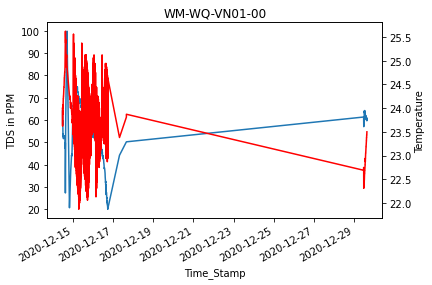

In [25]:
df_plot_main=df_plot.set_index('Time_Stamp')
ax1 = df_plot_main["TDSwithT"].plot()
plt.ylabel("TDS in PPM")
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df_plot_main["Temperature"].plot(ax=ax2, color="red")
plt.ylabel("Temperature")
plt.title("WM-WQ-VN01-00")
plt.savefig('WM-WQ-VN01-00', dpi=600)

In [26]:
df_plot.describe()

,Temperature,TDS-Voltage,TDSwithoutT,TDSwithT,Water_Level
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,23.704953,0.129208,53.191771,54.619122,12.360611
std,0.830976,0.030767,12.278232,12.858600,1.812631
min,21.870000,0.050000,19.980000,20.130000,4.390000
25%,23.120000,0.120000,48.277500,49.957500,12.770000
50%,23.560000,0.130000,54.185000,55.070000,12.890000
75%,24.250000,0.150000,62.072500,63.880000,13.020000
max,25.620000,0.250000,99.510000,99.740000,13.480000


# Plotting 1 Day Data :

In [27]:
df_oneday=df_plot_main.tail(144)

In [28]:
df_oneday.describe()

,Temperature,TDS-Voltage,TDSwithoutT,TDSwithT,Water_Level
count,144.000000,144.000000,144.000000,144.000000,144.000000
mean,23.175625,0.123750,50.967014,52.941875,8.114861
std,0.764291,0.038264,15.442758,16.494252,2.874819
min,22.310000,0.050000,19.980000,20.130000,4.390000
25%,22.620000,0.130000,54.232500,57.130000,6.440000
50%,22.940000,0.140000,59.220000,61.520000,6.440000
75%,23.380000,0.150000,60.000000,62.850000,11.610000
max,24.810000,0.150000,61.400000,64.260000,13.400000


Text(0.5, 1.0, 'TDS Variation in One day')

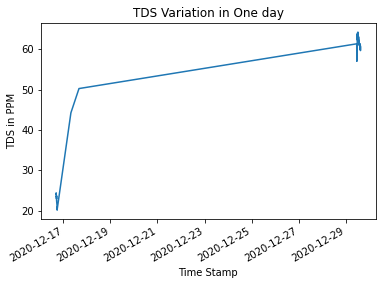

In [29]:
df_oneday["TDSwithT"].plot()
plt.xlabel("Time Stamp")
plt.ylabel("TDS in PPM")
plt.title("TDS Variation in One day")

Text(0.5, 1.0, 'Temperature Variation in One day')

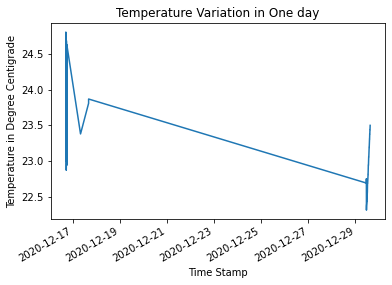

In [30]:
df_oneday["Temperature"].plot()
plt.xlabel("Time Stamp")
plt.ylabel("Temperature in Degree Centigrade")
plt.title("Temperature Variation in One day")

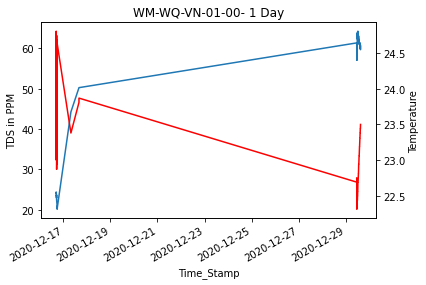

In [31]:

ax1 = df_oneday["TDSwithT"].plot()
plt.ylabel("TDS in PPM")
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df_oneday["Temperature"].plot(ax=ax2, color="red")
plt.ylabel("Temperature")
plt.title("WM-WQ-VN-01-00- 1 Day")
plt.savefig('WM-WQ-VN-01-00- 1 Day', dpi=600)

Text(0.5, 1.0, 'Water Level Variation in One day')

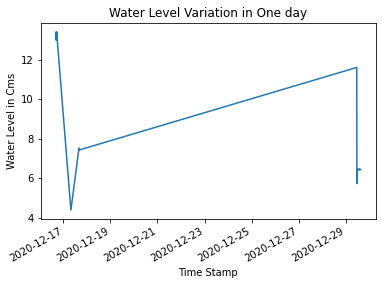

In [32]:
df_oneday["Water_Level"].plot()
plt.xlabel("Time Stamp")
plt.ylabel("Water Level in Cms")
plt.title("Water Level Variation in One day")

In [33]:
df_oneday.corr()

,Temperature,TDS-Voltage,TDSwithoutT,TDSwithT,Water_Level
Temperature,1.000000,-0.833117,-0.823742,-0.831926,0.746730
TDS-Voltage,-0.833117,1.000000,0.996121,0.996007,-0.920599
TDSwithoutT,-0.823742,0.996121,1.000000,0.999031,-0.928606
TDSwithT,-0.831926,0.996007,0.999031,1.000000,-0.922517
Water_Level,0.746730,-0.920599,-0.928606,-0.922517,1.000000
